# **COVID-19 - Pandemic in Morocco!**

À propos de ce fichier
Il s'agit d'un fichier .csv contenant des données sur l'évolution des cas de Covid-19 au Maroc, y compris ses 12 régions.

**Le virus Corona expliqué en termes simples:**

Disons que Mohamed a été infecté hier, mais il ne le saura pas avant les 14 prochains jours
Mohamed pense qu'il est en bonne santé mais il infecte 10 personnes par jour
Maintenant, ces 10 personnes pensent qu'elles sont en parfaite santé, elles voyagent, sortent et infectent 100 autres personnes
Ces 100 personnes pensent qu'elles sont en bonne santé mais elles ont déjà infecté 1000 personnes
Personne ne sait qui est en bonne santé ou qui peut vous infecter
Tout ce que vous pouvez faire, c'est être responsable, rester en quarentine
La COVID-19 affecte les individus de différentes manières. La plupart des personnes infectées développent une forme légère à modérée de la maladie et guérissent sans hospitalisation.
Symptômes les plus fréquents:
  fièvre
  toux sèche
  fatigue
Symptômes moins fréquents:
  courbatures
  maux de gorge
  diarrhée
  conjonctivite
  maux de tête
  perte de l’odorat ou du goût
  éruption cutanée, ou décoloration des doigts ou des orteils


**Importation des bibliothèques requises:**

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
import datetime as dt
import pandas as pd 


# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')











/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Télécharger les données 
À propos de jeu de données  Il s'agit d'un fichier .csv contenant des données sur l'évolution des cas de Covid-19 au Maroc, y compris ses 12 régions.il est disponible sur lien suivant :
« https://raw.githubusercontent.com/bakkarifatima/PROJET /master/corona_morocco.csv »


In [ ]:
url = 'https://raw.githubusercontent.com/bakkarifatima/PROJET-ML/master/corona_morocco.csv'

df = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")
df.head()

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
ï»¿Date,,,,,,,,,,,,,,,,
02/03/2020,1.0,NaN,NaN,28.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03/03/2020,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04/03/2020,2.0,NaN,NaN,34.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05/03/2020,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06/03/2020,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# remplacer les valeurs manquentes par 0
Nous devons remplacer les valeurs manquante par 0 avant l'étape d'exploration de données. Nous pouvons le faire simplement
par l"application du code suivant:

In [ ]:
#remplacer les valeurs manquentes par 0
df = df.fillna(0)

# Coordonnées des villes du Maroc
 

In [ ]:
# coordonnées des villes du Maroc
url = 'https://raw.githubusercontent.com/bakkarifatima/PROJET-ML/master/corona_morocco.csv'

df = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")
df.head()ytesIO(uploaded['coordonnées_maroc.xlsx'])    
coord_maroc= pd.read_excel('coordonnées_maroc.xlsx')
coord_copy = coord_maroc.copy()
coord_maroc

SyntaxError: ignored


# **Convertir la colonne Date en datetime pour une meilleure visualisation**

In [ ]:
#df['Date']=[dt.datetime.strptime(x,'%d/%m/%Y') for x in df['Date'] ]

**Ajout du cas actif et du nombre total de tests par jour**

pour le calcule des cas actif et le nombre de tests par jour , on a ajouter de colonnes qui contient ces 2 mesurant :



1.   actif_column= df**['Confirmed']** - df**['Recovered']** - df**['Deaths']**
2.   
total_test_perDay = df**['Confirmed']** + df**['Excluded']**





In [ ]:
actif_column= df['Confirmed'] - df['Recovered'] - df['Deaths']
total_test_perDay = df['Confirmed'] + df['Excluded']
df['Actif'] = actif_column
df['Total Test'] = total_test_perDay
df


,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Total Test
0,2020-03-02,1.0,0.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0
1,2020-03-03,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
2,2020-03-04,2.0,0.0,0.0,34.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,36.0
3,2020-03-05,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
4,2020-03-06,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2020-06-29,12290.0,225.0,8833.0,650524.0,153.0,3379.0,587.0,12.0,1248.0,75.0,458.0,1925.0,207.0,1953.0,93.0,2207.0,3232.0,662814.0
120,2020-06-30,12533.0,228.0,8920.0,668658.0,152.0,3427.0,587.0,13.0,1253.0,76.0,529.0,1941.0,206.0,1964.0,92.0,2299.0,3385.0,681191.0
121,2020-07-01,12636.0,228.0,9026.0,685492.0,152.0,3450.0,587.0,16.0,1292.0,75.0,535.0,1953.0,212.0,1973.0,93.0,2304.0,3382.0,698128.0
122,2020-07-02,12969.0,229.0,9090.0,702884.0,152.0,3497.0,587.0,16.0,1352.0,81.0,600.0,1977.0,212.0,1980.0,93.0,2430.0,3650.0,715853.0


**Représentation graphique du nombre de cas confirmés et de recouvrements.**

d'après le graphique ci-dessous, on peut dire que le nombre de nouveaux cas dépasse toujours le nombre de reprise


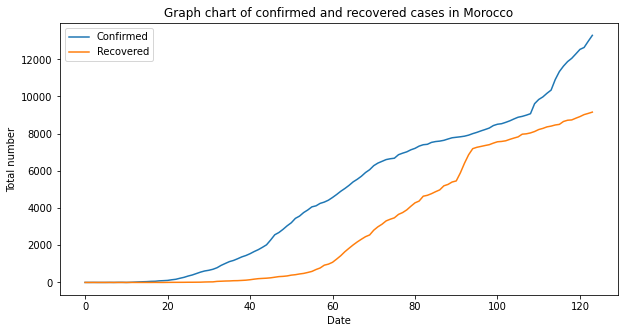

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df['Confirmed'],label='Confirmed')
sns.lineplot(data = df['Recovered'],label='Recovered')
plt.xlabel('Date')
plt.ylabel('Total number')
plt.title('Graph chart of confirmed and recovered cases in Morocco')

plt.legend()


*Définition de la colonne Date comme index *

In [ ]:
df = df.set_index('Date')

df.head()

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Total Test
Date,,,,,,,,,,,,,,,,,,
2020-03-02,1.0,0.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0
2020-03-03,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
2020-03-04,2.0,0.0,0.0,34.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,36.0
2020-03-05,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
2020-03-06,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0



**La répartition des nouveaux cas pour les lignes 14 et 15 Avril sur la région n'est pas disponible et cela affectera notre analyse**

In [ ]:
df['2020-04-13':'2020-04-16']

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Total Test
Date,,,,,,,,,,,,,,,,,,
2020-04-13,1763.0,126.0,203.0,7365.0,48.0,521.0,78.0,2.0,233.0,1.0,4.0,335.0,123.0,225.0,24.0,169.0,1434.0,9128.0
2020-04-14,1888.0,126.0,217.0,8034.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1545.0,9922.0
2020-04-15,2024.0,127.0,229.0,8626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1668.0,10650.0
2020-04-16,2283.0,130.0,249.0,10388.0,56.0,681.0,80.0,2.0,317.0,1.0,4.0,487.0,140.0,258.0,27.0,230.0,1904.0,12671.0


**La solution optimale pour les données manquantes dans cet exemple est de les supprimer.**

In [ ]:
my_data_ori = df.copy() # plus tard, on aura besoin de toutes les colonnes Confirmé, Décès et Récupéré pour toutes les dates à l'exception du 14,15 avril

df = df[df.index != '2020-04-14']
df = df[df.index != '2020-04-15']

**Evulution quotidienne du test total**

le nombre des tests effectuées par jour connu une forte augmentation et surtout 
A partir de mi-avril

Text(0, 0.5, 'Number of tests')

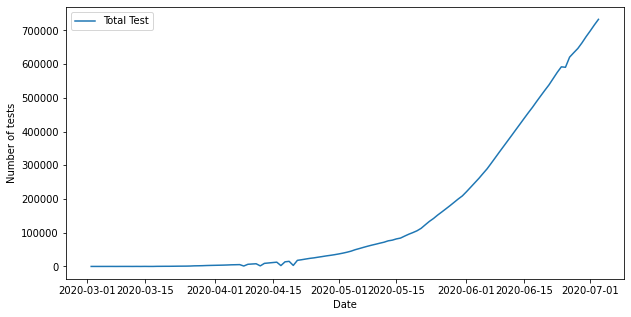

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df['Total Test'],label='Total Test')
plt.xlabel('Date')
plt.ylabel('Number of tests')

**Corrélation entre le nombre de tests par jour et les nouveaux cas confirmés**

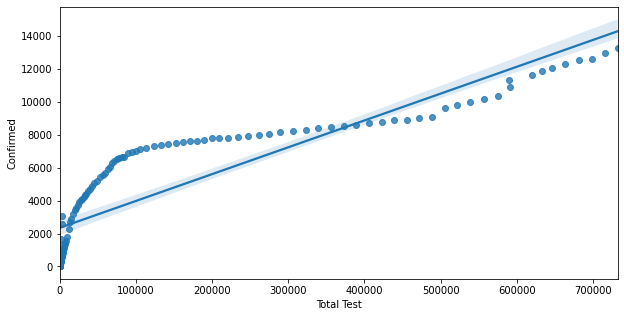

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x = df['Total Test'],y = df['Confirmed'])


**Représentation graphique de l'évolution du nombre total de cas par région**

In [ ]:
# Selection regions
Regions1 = ['Beni Mellal-Khenifra',
       'Casablanca-Settat', 'Draa-Tafilalet', 'Dakhla-Oued Ed-Dahab',
       'Fes-Meknes', 'Laayoune-Sakia El Hamra','Guelmim-Oued Noun', 'Laayoune-Sakia El Hamra',
       'Marrakesh-Safi', 'Oriental', 'Rabat-Sale-Kenitra', 'Souss-Massa','Tanger-Tetouan-Al Hoceima']


plt.figure(figsize=(14,8))
sns.lineplot(data = df[Regions1],dashes=False)
plt.text('2020-05-10', 2250, 'Casabalanca-Settat', fontsize=12,color='#ff4500')
plt.text('2020-05-12', 1350, 'Marrakesh-Safi', fontsize=12,color='#4682B4')
plt.text('2020-05-10', 1100, 'Tanger-Tetouan-Al Hoceima', fontsize=10,color='#FF69B4')
plt.title('Total cases evolution per region',fontsize = 20)


Text(0.5, 1.0, 'Total cases evolution per region')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb9a54c0e18> (for post_execute):


ConversionError: ignored

ConversionError: ignored

<Figure size 1008x576 with 1 Axes>

Text(0.5, 1.0, 'Total case per region')

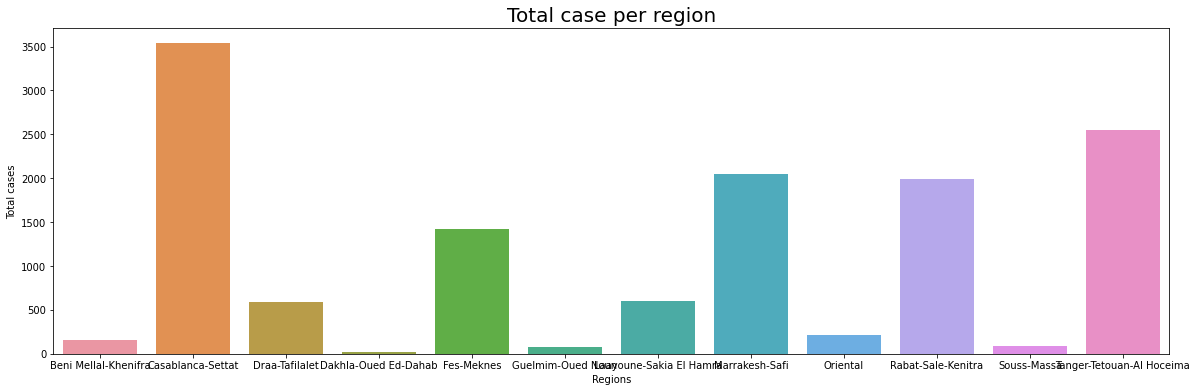

In [ ]:
region_bar = df.iloc[[-1]].transpose()
region_bar = region_bar.drop(['Confirmed','Recovered','Deaths','Excluded','Actif','Total Test'])
region_bar.columns=['Total cases']
region_bar.index.name = 'Regions'
plt.figure(figsize=(20,6))
sns.barplot(x=region_bar.index,y='Total cases',data=region_bar)
plt.title('Total case per region',fontsize=20)

**Représentation graphique des cas actifs**



*Du 15 mars au 1er mai, le nombre de cas a fortement augmenté et il a diminué de mi-mai au 1er juin après que ce dernier ait connu une certaine stabilité jusqu'à mi-juin puis il a recommencé à augmenter






**`*NB: les lignes verticales rouges représentent les périodes de confinement *`**

ConversionError: ignored

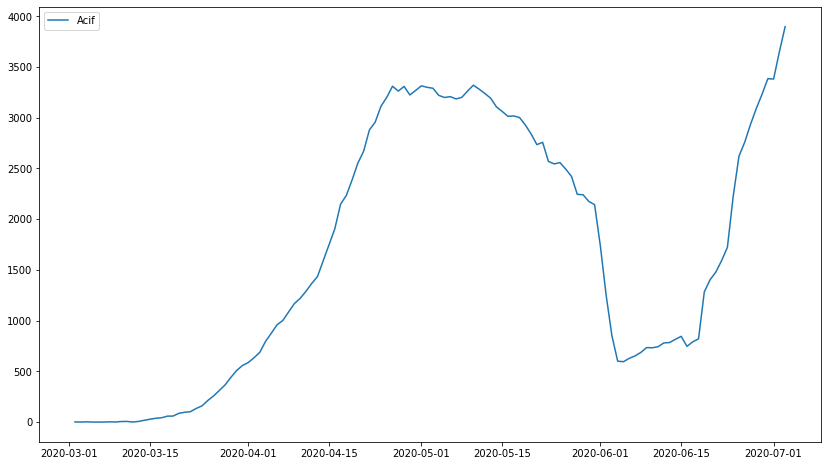

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(data = df['Actif'],label='Acif')
plt.axvline('2020-03-20',ls = '--',c = 'r')
plt.axvline('2020-04-20',ls = '--',c = 'r')
plt.axvline('2020-05-20',ls = '--',c = 'r')
plt.axvline('2020-06-10',ls = '--',c = 'g')
plt.text('2020-03-21', 1500, 'Lockdown', fontsize=12,color='#FF0000')
plt.text('2020-04-21', 1500, 'Lockdown extended', fontsize=12,color='#FF0000')
plt.text('2020-05-21', 1500, 'Lockdown extended', fontsize=12,color='#FF0000')
plt.text('2020-06-11', 1500, 'Lockdown End', fontsize=12,color='#00FA00')
plt.xlabel('Date')
plt.ylabel('Total actif cases')
plt.title('Actif cases ')
plt.legend()

**Pourcentage d'Actif, décès et guérisons par jour**

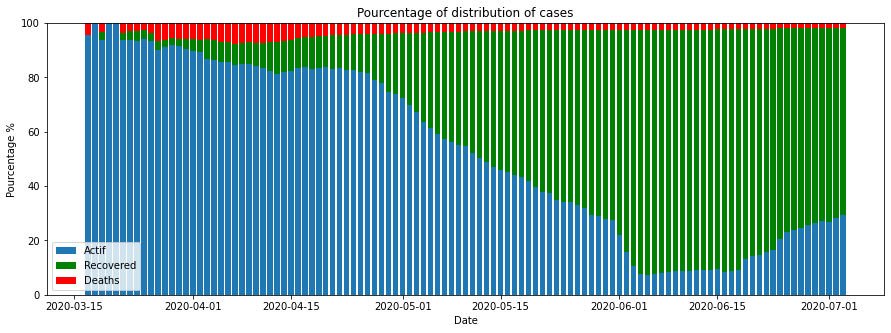

In [ ]:
#obtenir les données a tracer
plt.figure(figsize=(15,5))
dataVar1 =(my_data_ori['Actif']*100/my_data_ori['Confirmed'])[15:]
dataVar3 =(my_data_ori['Deaths']*100/my_data_ori['Confirmed'])[15:]
dataVar2 =(my_data_ori['Recovered']*100/my_data_ori['Confirmed'])[15:]


# tracer chaque donnée
p1 = plt.bar(dataVar1.index, 
             dataVar1,label='Actif')

p2 = plt.bar(dataVar2.index, 
             dataVar2,
             bottom=dataVar1,color='g',label='Recovered')

p3 = plt.bar(dataVar3.index,
             dataVar3,
             bottom=dataVar1+dataVar2,color='r',label='Deaths')

plt.xlabel('Date')
plt.ylabel('Pourcentage %')
plt.title('Pourcentage of distribution of cases')
plt.legend()

**Représentation graphique du nombre total de cas par région**

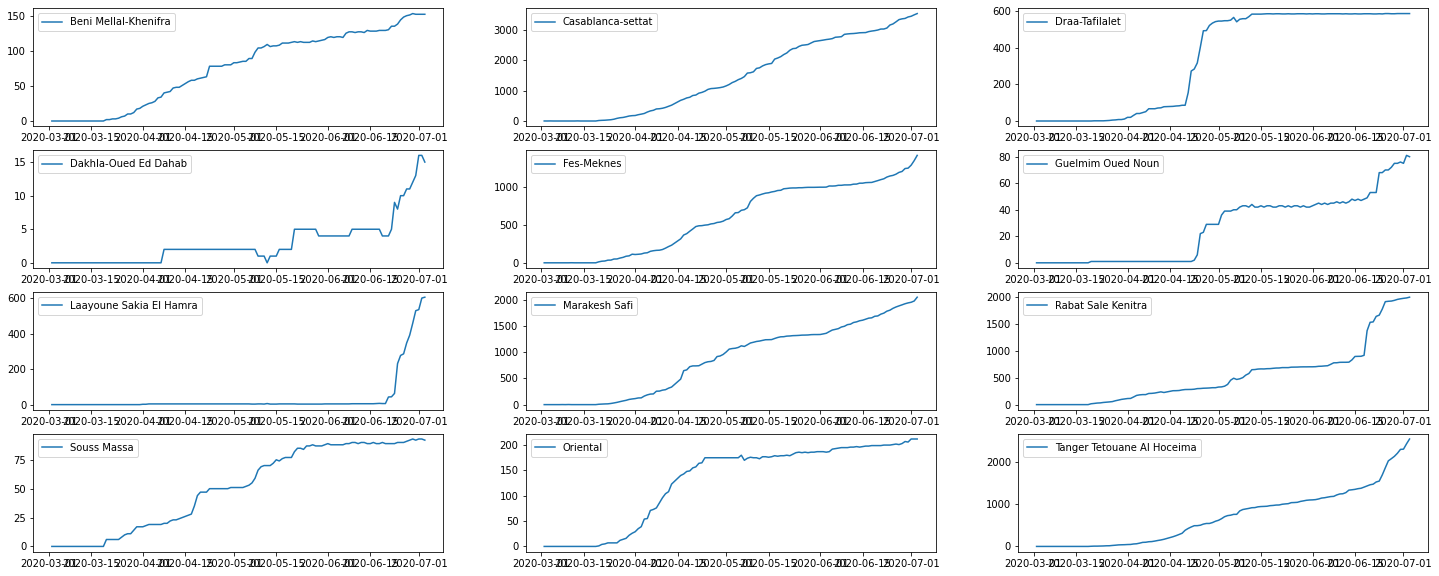

In [ ]:
plt.figure(figsize=(25,10))

BM = df['Beni Mellal-Khenifra']
CS = df['Casablanca-Settat']
DT = df['Draa-Tafilalet']
DO = df['Dakhla-Oued Ed-Dahab']
FM = df['Fes-Meknes']
GO = df['Guelmim-Oued Noun']
LS = df['Laayoune-Sakia El Hamra']
MS = df['Marrakesh-Safi']
Or = df['Oriental']
RS = df['Rabat-Sale-Kenitra']
SM = df['Souss-Massa']
TT = df['Tanger-Tetouan-Al Hoceima']

ax1 = plt.subplot(4, 3, 1)
sns.lineplot(data = BM,label='Beni Mellal-Khenifra')
ax2 = plt.subplot(4, 3, 2)
sns.lineplot(data = CS,label='Casablanca-settat')
ax3 = plt.subplot(4, 3, 3)
sns.lineplot(data = DT,label='Draa-Tafilalet')
ax4 = plt.subplot(4, 3, 4)
sns.lineplot(data = DO,label='Dakhla-Oued Ed Dahab')
ax5 = plt.subplot(4, 3, 5)
sns.lineplot(data = FM,label='Fes-Meknes')
ax6 = plt.subplot(4, 3, 6)
sns.lineplot(data = GO,label='Guelmim Oued Noun')
ax7 = plt.subplot(4, 3, 7)
sns.lineplot(data = LS,label='Laayoune Sakia El Hamra')
ax8 = plt.subplot(4, 3, 8)
sns.lineplot(data = MS,label='Marakesh Safi')
ax9 = plt.subplot(4, 3, 9)
sns.lineplot(data = RS,label='Rabat Sale Kenitra')
ax10 = plt.subplot(4, 3, 10)
sns.lineplot(data = SM,label='Souss Massa')
ax11 = plt.subplot(4, 3, 11)
sns.lineplot(data = Or,label='Oriental')
ax12 = plt.subplot(4, 3, 12)
sns.lineplot(data = TT,label='Tanger Tetouane Al Hoceima')


**Graphique circulaire du nombre total de cas par région**

Text(0.5, 1.0, 'Pie Chart of Total cases per region')

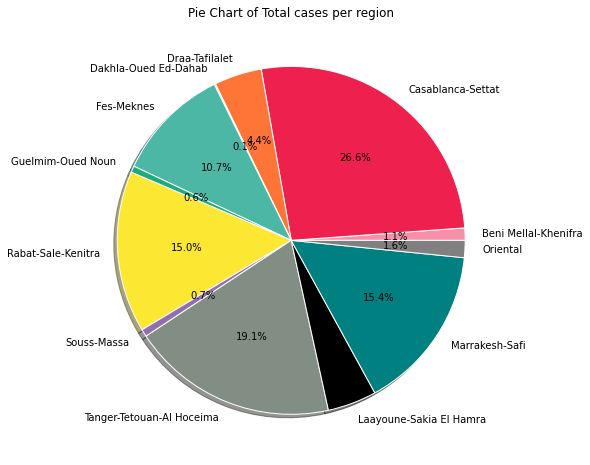

In [ ]:
plt.figure(figsize=(16,8))
Slice = [df['Beni Mellal-Khenifra'][-1],df['Casablanca-Settat'][-1],df['Draa-Tafilalet'][-1],
        df['Dakhla-Oued Ed-Dahab'][-1],df['Fes-Meknes'][-1],df['Guelmim-Oued Noun'][-1],
        df['Rabat-Sale-Kenitra'][-1],df['Souss-Massa'][-1],df['Tanger-Tetouan-Al Hoceima'][-1],
        df['Laayoune-Sakia El Hamra'][-1],df['Marrakesh-Safi'][-1],df['Oriental'][-1]]
Labels = ['Beni Mellal-Khenifra','Casablanca-Settat','Draa-Tafilalet','Dakhla-Oued Ed-Dahab','Fes-Meknes',
         'Guelmim-Oued Noun','Rabat-Sale-Kenitra','Souss-Massa','Tanger-Tetouan-Al Hoceima','Laayoune-Sakia El Hamra',
         'Marrakesh-Safi','Oriental']
Colors = ['#f78fA7','#EE204D','#FF7538','#1F75FE','#4CB7A5','#1CAC78','#FCE833', '#926EAE', '#828E84' ,
          '#000000', '#008080','#808080']
Explode = [0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(Slice,colors = Colors,explode = Explode,shadow = True,autopct='%1.1f%%',
        labels = Labels,wedgeprops = {'edgecolor':'white'})


plt.title('Pie Chart of Total cases per region')


casablanca-Settat, Tanger-Tétouan Al Hoceima, Marrakech Safi ont les plus grandes valeurs du nombre total de cas, en raison de l'épicentre commercial, industriel et familial, en particulier pour les villes de Casablanca et Tanger qui représentent les plus grandes zones industrielles du Maroc.



# **Partie 2: Prévision du nombre total de cas - Décès et cas confirmés**

tout a changé lorsque Sean J.Taylor et Ben Letham de Facebook ont ​​introduit l' algorithme ` ` Prophète '' en 2017

C'est un algorithme pour construire des modèles de prévision pour les données de séries chronologiques. 
Contrairement à l'approche traditionnelle, il essaie d'adapter les modèles de régression additive, appelés «ajustement de courbe».

Ce qui est cool avec cet algorithme, c'est qu'il est très flexible en ce qui concerne les données qui sont transmises à l'algorithme. Vous pouvez avoir des NA et vous n'avez pas besoin d'avoir toutes les dates et heures alignées.
Et, cela fonctionne assez raisonnablement par défaut, sans définir explicitement de paramètres.
 Et si vous avez une connaissance du domaine, vous pouvez configurer certains paramètres pour améliorer davantage le modèle, mais ces paramètres sont assez simples à comprendre.

Importer prophet



In [ ]:
from fbprophet import Prophet


In [ ]:
total_Deaths = df['Deaths']
total_Confirmed = df['Confirmed']
total_Recovered = df['Recovered']
taux_mortalité = 100*total_Deaths/total_Confirmed

In [ ]:
# Ajout d'une nouvelle colonne de cas quotidiens à nos données

new_cases = []
for i in range(len(total_Confirmed)):
    if i == 0:
        new_cases.append(0)
    elif total_Confirmed[i] < total_Confirmed[i-1]:
        new_cases.append(0)
    else:
        temp = int(total_Confirmed[i] - total_Confirmed[i-1])
        new_cases.append(temp)
new_cases = np.array(new_cases)
df['New cases'] = new_cases

In [ ]:
df1 = pd.DataFrame(df['New cases'])
df1.style.background_gradient(cmap='Reds')
df

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Total Test,New cases
Date,,,,,,,,,,,,,,,,,,,
2020-03-02,1.0,0.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,0
2020-03-03,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0
2020-03-04,2.0,0.0,0.0,34.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,36.0,2
2020-03-05,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0
2020-03-06,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,12290.0,225.0,8833.0,650524.0,153.0,3379.0,587.0,12.0,1248.0,75.0,458.0,1925.0,207.0,1953.0,93.0,2207.0,3232.0,662814.0,238
2020-06-30,12533.0,228.0,8920.0,668658.0,152.0,3427.0,587.0,13.0,1253.0,76.0,529.0,1941.0,206.0,1964.0,92.0,2299.0,3385.0,681191.0,243
2020-07-01,12636.0,228.0,9026.0,685492.0,152.0,3450.0,587.0,16.0,1292.0,75.0,535.0,1953.0,212.0,1973.0,93.0,2304.0,3382.0,698128.0,103


In [ ]:
#visualiser la situation actuelle

import plotly.express as px
import plotly.graph_objects as go


fig = px.bar(df, x=df.index, y="New cases", color='New cases', orientation='v', height=600,
             title='Confirmed Cases in Morocco', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y = df['Confirmed'], mode= 'lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=df.index, y = df['Recovered'], mode='lines+markers',name='Recovered',line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=df.index, y=df['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.update_layout(title_text='Trend of Coronavirus Cases in Morocco (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y = df['Actif'], mode= 'lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Actif Coronavirus Cases in Morocco ',plot_bgcolor='rgb(230, 230, 230)')
fig.show()


**Prédire la tendance des cas confirmés dans les 10 prochains jours**


L'entrée de Prophet est toujours une trame de données avec deux colonnes: ds et y. La colonne ds (datestamp) doit être d'un format attendu par Panda, idéalement AAAA-MM-JJ pour une date ou AAAA-MM-JJ HH: MM: SS pour un datetime. La colonne y doit être numérique et représente la mesure que nous souhaitons prévoir


In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

confirmed.columns = ['ds','y']

Génération d'une prévision à 10 jours des cas confirmés à l'aide de Prophet, avec un intervalle de prédiction de 95% en créant un modèle de base sans ajustement des paramètres liés à la saisonnalité et des régresseurs supplémentaires.


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=15)
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
127,2020-07-09
128,2020-07-10
129,2020-07-11
130,2020-07-12
131,2020-07-13
132,2020-07-14
133,2020-07-15
134,2020-07-16
135,2020-07-17
136,2020-07-18
